In [71]:
import numpy as np

In [72]:
import pandas as pd

In [73]:
import tensorflow as tf
import sklearn as sk

In [74]:
import matplotlib as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_recall_curve

In [75]:
df=sns.load_dataset('titanic')
#df=bit.ly/DL_MLload_titanic()
#df.describe()
#df.head()

In [76]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [81]:
df['age'] = df['age'].fillna(df['age'].median())


In [82]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [83]:
df = df.drop(['deck', 'embark_town'], axis=1)


In [84]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [85]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [86]:
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [87]:
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]

In [88]:
y=df['embarked']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)

In [90]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [91]:
rf_model = RandomForestClassifier(random_state=42)

In [92]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred_lr = lr_model.predict(X_test)

In [94]:
y_pred_rf = rf_model.predict(X_test)

AttributeError: module 'matplotlib' has no attribute 'title'

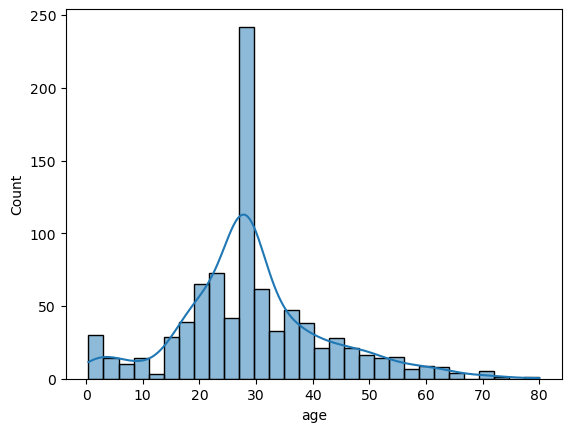

In [95]:
# Plotting distributions
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()


AttributeError: module 'matplotlib' has no attribute 'title'

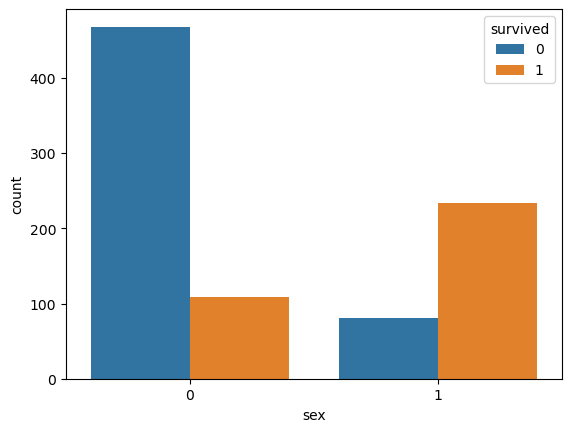

In [110]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Sex')
plt.show()


sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

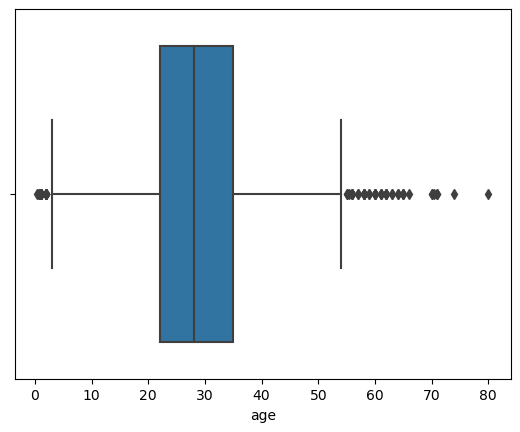

In [108]:

sns.boxplot(x=df.age)
plt.title("Age Outliers")
plt.show()

In [109]:

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Titanic Dataset EDA')



ImportError: cannot import name 'TypeIs' from 'typing_extensions' (C:\Users\admin\anaconda3\Lib\site-packages\typing_extensions.py)

In [ ]:

import os
os.makedirs('../reports', exist_ok=True)

profile.to_file('../reports/eda_titanic_report.html')

In [106]:
pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/79/70/1430ad64b36c3d11abd222a95c1568ee56f5a23b07224c699f2b64825bb9/ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/b0/1d/407b29780a289868ed696d1616f4aad49d6388e5a77f567dcd2629dcd7b8/pydantic-2.11.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 65.2/65.2 kB 1.8 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.8.2,>=0.7.5 from https://files.pythonhosted.org/packages/90/36/4a0d674198adabadba21eb4048df5cc2e25a4ecff38d75e974d51a83fda2/visions-0.8.1-py3-none-any.whl.metadata
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://files.pythonhosted.org/packages/95/e3/250ce99ed761389028543fcb876176ba619f6

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.11.3 which is incompatible.
